## Quarter Turns

### What is a quarter turn?

A *quarter turn* in the single-qubit context means a rotation by $\theta=\pi/2$ (90°) about some axis on the Bloch sphere. The generic rotation operator about axis $\hat{n}$ is
$$
    R_{\hat{n}}(\theta) = e^{-i\frac{\theta}{2} (\hat{n}\cdot\vec{\sigma})},
$$
so for the Pauli axes we write the common cases:
- $R_x(\pi/2)=e^{-i(\pi/4) X}$
- $R_y(\pi/2)=e^{-i(\pi/4) Y}$
- $R_z(\pi/2)=e^{-i(\pi/4) Z}$
Important standard gate connections (up to an overall global phase):
- The **S** gate is the same as $R_z(\pi/2)$ up to a global phase.
- The **T** gate is $R_z(\pi/4)$ (an eighth-turn) up to a global phase.

### Quick math: Rz($\pi/2$) and the S gate

The matrix for $R_z(\theta)$ is
$$
    R_z(\theta)=\begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}.
$$
For $\theta=\pi/2$:
$$
    R_z(\tfrac{\pi}{2})=\begin{pmatrix} e^{-i\pi/4} & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}=e^{-i\pi/4}\begin{pmatrix}1&0\\0&i\end{pmatrix}=e^{-i\pi/4}S.
$$
So $R_z(\pi/2)=\text{global-phase}\times S$.

In [2]:
# Cell 1 — imports and helper functions
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector

# helper to run circuits and return statevector
sim = AerSimulator()

def get_statevector(qc):
    qc = qc.copy()
    qc.save_statevector()
    tqc = transpile(qc, sim)
    result = sim.run(tqc).result()
    return result.get_statevector()

Statevector Rz(pi/2) on |0>:
 Statevector([0.70710678-0.70710678j, 0.        +0.j        ],
            dims=(2,))

Statevector S on |0>:
 Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


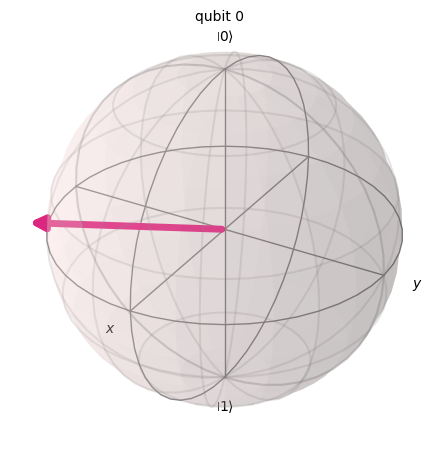

In [3]:
# Cell 2 — Rz(pi/2) vs S on |0> and |+>
from math import pi

# prepare |0>
qc0 = QuantumCircuit(1)
qc0.rz(pi/2, 0)
sv_rz_0 = get_statevector(qc0)

# apply S
tqc0s = QuantumCircuit(1)
tqc0s.s(0)
sv_s_0 = get_statevector(tqc0s)

print('Statevector Rz(pi/2) on |0>:\n', sv_rz_0)
print('\nStatevector S on |0>:\n', sv_s_0)

# show Bloch for |+> rotated by Rz(pi/2) and by S
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
qc_plus.rz(pi/2, 0)
sv_plus_rz = get_statevector(qc_plus)

qc_plus_s = QuantumCircuit(1)
qc_plus_s.h(0)
qc_plus_s.s(0)
sv_plus_s = get_statevector(qc_plus_s)

plot_bloch_multivector([sv_plus_rz, sv_plus_s])

Rx(pi/2) statevector:
 Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))

H Rz(pi/2) H statevector:
 Statevector([7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j],
            dims=(2,))


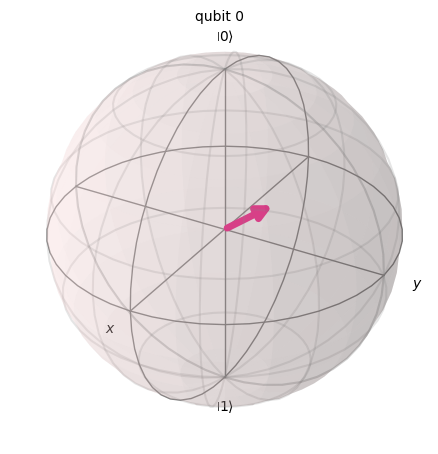

In [4]:
# Cell 3 — Rx(pi/2) as H Rz(pi/2) H (up to global phase)
qc_rx = QuantumCircuit(1)
qc_rx.rx(pi/2, 0)
sv_rx = get_statevector(qc_rx)

qc_hrzh = QuantumCircuit(1)
qc_hrzh.h(0)
qc_hrzh.rz(pi/2, 0)
qc_hrzh.h(0)
sv_hrzh = get_statevector(qc_hrzh)

print('Rx(pi/2) statevector:\n', sv_rx)
print('\nH Rz(pi/2) H statevector:\n', sv_hrzh)

plot_bloch_multivector([sv_rx, sv_hrzh])

Statevector after 4 Rz(pi/2):
 Statevector([-1.+1.2246468e-16j, -0.+0.0000000e+00j],
            dims=(2,))


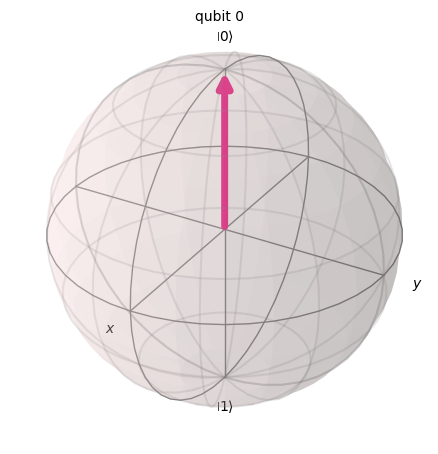

In [5]:
# Cell 4 — compose quarter turns to get half-turns and full turns
qc_chain = QuantumCircuit(1)
qc_chain.rz(pi/2, 0)
qc_chain.rz(pi/2, 0)
qc_chain.rz(pi/2, 0)
qc_chain.rz(pi/2, 0)
sv_chain = get_statevector(qc_chain)
print('Statevector after 4 Rz(pi/2):\n', sv_chain)

plot_bloch_multivector(sv_chain)

### Worked observations
- Repeated quarter turns around same axis combine additively: four $R_z(\pi/2)$ equal $R_z(2\pi)$.
- Rotations about different axes do not commute in general.
- The S gate is $R_z(\pi/2)$ (up to phase); T is $R_z(\pi/4)$.

### Exercises (suggested)
1. Apply `rx(pi/2)`, `ry(pi/2)`, `rz(pi/2)` to `|0>` and `|1>` and plot.
2. Show that `S = Rz(pi/2)` up to phase by dividing statevectors.
3. Compare `R_x(pi/2) R_z(pi/2)` and `R_z(pi/2) R_x(pi/2)` via Bloch vectors.

In [ ]:
# Exercise 1 — quarter-turn named gates and their inverses
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

pi = np.pi

# Basis states
bases = {
    '|0⟩': Statevector.from_label('0'),
    '|1⟩': Statevector.from_label('1')
}

# Use single-letter axis labels to avoid 'rrz' error
quarter_turns = {
    'S'   : ('z',  pi/2),
    'S†'  : ('z', -pi/2),
    'V'   : ('x',  pi/2),
    'V†'  : ('x', -pi/2),
    'Hₚₛ' : ('y',  pi/2),   # pseudo-Hadamard
    'Hₚₛ†': ('y', -pi/2)
}

for b_label, sv in bases.items():
    print(f"\n=== Results for {b_label} ===")
    for g_label, (axis, theta) in quarter_turns.items():
        qc = QuantumCircuit(1)
        getattr(qc, f"r{axis}")(theta, 0)
        out = sv.evolve(qc)
        print(f"{g_label} ({axis}-rotation {theta/pi:.2f}π): {np.round(out.data, 6)}")
        plot_bloch_multivector(out)

# Numeric equivalence checks (up to global phase)
print("\n--- Numeric checks (overlaps) ---")
test_sv = Statevector.from_label('+')


# S vs Rz(pi/2)
qc_s = QuantumCircuit(1); qc_s.s(0)
qc_rz = QuantumCircuit(1); qc_rz.rz(pi/2, 0)
sv_s = test_sv.evolve(qc_s)
sv_rz = test_sv.evolve(qc_rz)
ov = np.vdot(sv_s.data, sv_rz.data)
print("S vs Rz(pi/2): overlap magnitude =", np.abs(ov), "phase =", np.angle(ov))

# V vs Rx(pi/2)
qc_v = QuantumCircuit(1); qc_v.rx(pi/2, 0)
qc_rx = QuantumCircuit(1); qc_rx.rx(pi/2, 0)
sv_v = test_sv.evolve(qc_v)
sv_rx = test_sv.evolve(qc_rx)
ov2 = np.vdot(sv_v.data, sv_rx.data)
print("V vs Rx(pi/2): overlap magnitude =", np.abs(ov2), "phase =", np.angle(ov2))

# H_ps vs Ry(pi/2)
qc_hps = QuantumCircuit(1); qc_hps.ry(pi/2, 0)
qc_ry = QuantumCircuit(1); qc_ry.ry(pi/2, 0)
sv_hps = test_sv.evolve(qc_hps)
sv_ry = test_sv.evolve(qc_ry)
ov3 = np.vdot(sv_hps.data, sv_ry.data)
print("H_ps vs Ry(pi/2): overlap magnitude =", np.abs(ov3), "phase =", np.angle(ov3))



=== Results for |0⟩ ===
S (z-rotation 0.50π): [0.707107-0.707107j 0.      +0.j      ]
S† (z-rotation -0.50π): [0.707107+0.707107j 0.      +0.j      ]
V (x-rotation 0.50π): [0.707107+0.j       0.      -0.707107j]
V† (x-rotation -0.50π): [0.707107+0.j       0.      +0.707107j]
Hₚₛ (y-rotation 0.50π): [0.707107+0.j 0.707107+0.j]
Hₚₛ† (y-rotation -0.50π): [ 0.707107+0.j -0.707107+0.j]

=== Results for |1⟩ ===
S (z-rotation 0.50π): [0.      +0.j       0.707107+0.707107j]
S† (z-rotation -0.50π): [0.      +0.j       0.707107-0.707107j]
V (x-rotation 0.50π): [0.      -0.707107j 0.707107+0.j      ]
V† (x-rotation -0.50π): [0.      +0.707107j 0.707107+0.j      ]
Hₚₛ (y-rotation 0.50π): [-0.707107+0.j  0.707107+0.j]
Hₚₛ† (y-rotation -0.50π): [0.707107+0.j 0.707107+0.j]

--- Numeric checks (overlaps) ---
S vs Rz(pi/2): overlap magnitude = 1.0 phase = -0.7853981633974483
V vs Rx(pi/2): overlap magnitude = 1.0 phase = 0.0
H_ps vs Ry(pi/2): overlap magnitude = 1.0 phase = 0.0


In [10]:
# Exercise 2 — check S vs Rz(pi/2) up to global phase
from qiskit.circuit.library import SGate

# choose test states (|0>, |+>)
test_states = {'|0>': Statevector.from_label('0'),
               '|+>': Statevector.from_label('+')}

for label, sv in test_states.items():
    # prepare circuits
    qc_rz = QuantumCircuit(1)
    qc_rz.rz(pi/2, 0)
    sv_rz = sv.evolve(qc_rz)

    qc_s = QuantumCircuit(1)
    qc_s.s(0)
    sv_s = sv.evolve(qc_s)

    # inner product <sv_s | sv_rz> gives phase factor (up to numerical)
    overlap = np.vdot(sv_s.data, sv_rz.data)   # complex scalar
    phase = np.angle(overlap)                 # principal value of phase
    mag = np.abs(overlap)

    print(f"\nTesting on {label}:")
    print("  ⟨Sψ | Rz(π/2)ψ⟩ = ", overlap)
    print("  magnitude (should be ~1):", mag)
    print("  relative phase (radians):", np.round(phase, 8))
    print("  expected global phase between Rz(π/2) and S: -π/4  (i.e. e^{-iπ/4})")
    # compute predicted complex factor e^{-iπ/4}
    predicted = np.exp(-1j * np.pi/4)
    print("  predicted factor e^{-iπ/4} =", np.round(predicted, 8))
    print("  difference between overlap and predicted factor:", np.round(overlap - predicted, 8))



Testing on |0>:
  ⟨Sψ | Rz(π/2)ψ⟩ =  (0.7071067811865476-0.7071067811865476j)
  magnitude (should be ~1): 1.0000000000000002
  relative phase (radians): -0.78539816
  expected global phase between Rz(π/2) and S: -π/4  (i.e. e^{-iπ/4})
  predicted factor e^{-iπ/4} = (0.70710678-0.70710678j)
  difference between overlap and predicted factor: 0j

Testing on |+>:
  ⟨Sψ | Rz(π/2)ψ⟩ =  (0.7071067811865475-0.7071067811865475j)
  magnitude (should be ~1): 1.0
  relative phase (radians): -0.78539816
  expected global phase between Rz(π/2) and S: -π/4  (i.e. e^{-iπ/4})
  predicted factor e^{-iπ/4} = (0.70710678-0.70710678j)
  difference between overlap and predicted factor: (-0+0j)


In [11]:
# Exercise 3 — compare sequences and visualise
initial = Statevector.from_label('0')

# Sequence A: Rx then Rz
qc_A = QuantumCircuit(1)
qc_A.rx(pi/2, 0)
qc_A.rz(pi/2, 0)
sv_A = initial.evolve(qc_A)

# Sequence B: Rz then Rx
qc_B = QuantumCircuit(1)
qc_B.rz(pi/2, 0)
qc_B.rx(pi/2, 0)
sv_B = initial.evolve(qc_B)

# Print statevectors
print("Statevector after Rx(π/2) then Rz(π/2):", np.round(sv_A.data, 6))
print("Statevector after Rz(π/2) then Rx(π/2):", np.round(sv_B.data, 6))

# Overlap and phase check: if they differed only by a global phase, overlap magnitude = 1
overlap = np.vdot(sv_A.data, sv_B.data)
print("\nOverlap <A|B> =", overlap, "  magnitude =", np.abs(overlap), "  phase =", np.angle(overlap))

# Visualise both Bloch vectors together
plot_bloch_multivector([sv_A, sv_B])

# Optional: show the operator-level non-commutation (matrix)
op_A = Operator(qc_A)
op_B = Operator(qc_B)
commutator = op_A.data @ op_B.data - op_B.data @ op_A.data
print("\nOperator commutator norm (should be non-zero if non-commuting):", np.linalg.norm(commutator))


Statevector after Rx(π/2) then Rz(π/2): [0.5-0.5j 0.5-0.5j]
Statevector after Rz(π/2) then Rx(π/2): [ 0.5-0.5j -0.5-0.5j]

Overlap <A|B> = (0.5000000000000002-0.5000000000000002j)   magnitude = 0.7071067811865479   phase = -0.7853981633974483

Operator commutator norm (should be non-zero if non-commuting): 2.000000000000001


| Gate                         | Definition                       | Equivalent Rotation | Matrix Representation                                                             | Notes                                                            |
| ---------------------------- | -------------------------------- | ------------------ | --------------------------------------------------------------------------------- | ---------------------------------------------------------------- |
| **S gate**                   | Phase gate adding a $\pi/2$ phase to | $\ket{1}$ | $R_z(\pi/2)$ | $$S = \begin{pmatrix}1 & 0 \\ 0 & i\end{pmatrix}$$ | A quarter turn about the Z-axis. |
| **S† gate**                  | Inverse of S                     | $R_z(-\pi/2)$    | $$S^\dagger = \begin{pmatrix}1 & 0 \\ 0 & -i\end{pmatrix}$$ | Rotates $-\pi/2$ around Z. |
| **V gate**                   | Quarter turn about the X-axis    | $R_x(\pi/2)$     | $$V = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i \\ -i & 1\end{pmatrix}$$ | Sometimes called the “square root of X” gate, since $V^2 = X$. |
| **V† gate**                  | Inverse of V                     | $R_x(-\pi/2)$    | $$V^\dagger = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & i \\ i & 1\end{pmatrix}$$ | $(V^\dagger)^2 = X$. |
| **Pseudo-Hadamard ($H_{ps}$)** | Quarter turn about Y-axis        | $R_y(\pi/2)$     | $$H_{ps} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & -1 \\ 1 & 1\end{pmatrix}$$ | Sometimes called $\sqrt{Y}$, since $(H_{ps})^2 = Y$. |
| **Pseudo-Hadamard†**         | Inverse of $H_{ps}$              | $R_y(-\pi/2)$    | $$H_{ps}^\dagger = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ -1 & 1\end{pmatrix}$$ | Rotates opposite direction around Y. |

\* **Note on Equivalent Rotation:**  
The “Equivalent Rotation” column shows the Bloch-sphere rotation corresponding to the gate **up to a global phase**. For computational basis states $|0\rangle$ and $|1\rangle$, this rotation only introduces a global phase and does not change the physical state (i.e., the Bloch vector stays along the Z-axis). For superposition states, it changes **relative phases**, which is physically observable.